In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
src = ceo.Source('R',rays_box_size=25.5,rays_box_sampling=128,rays_origin=[0,0,25])
gmt = ceo.GMT_MX()

In [3]:
src.reset()
gmt.propagate(src)

In [4]:
img = ceo.Imaging(1)

0.00445799 3.02898


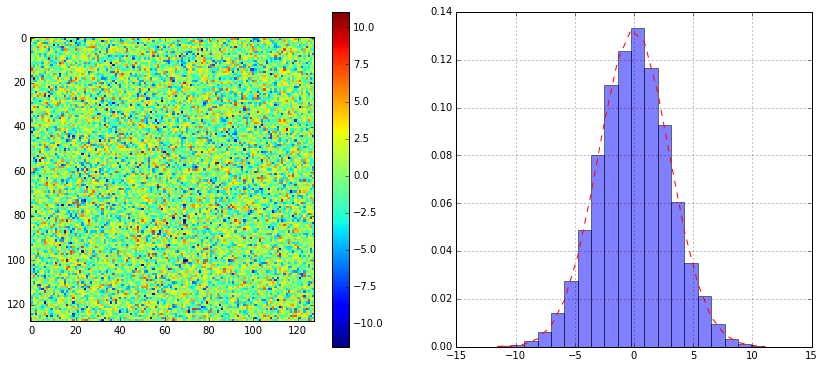

In [5]:
img.reset()
ron = 3
img.readOut(1.,ron)

(fig,(ax1,ax2)) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(img.frame.host(),interpolation='none')
plt.colorbar(h1,ax=ax1)

print np.mean(img.frame.host_data), np.std(img.frame.host_data)

if np.any(img.frame.host_data):
    n, bins, patches = ax2.hist(img.frame.host_data.ravel(),20, normed=1, alpha=0.5)
    y = mlab.normpdf( bins, 0, ron)
    l = ax2.plot(bins, y, 'r--', linewidth=1)
    ax2.grid(True)

In [6]:
src.nBackgroundPhoton(10)*img.pixelScaleArcsec(src)**2

2668.3832212074662

In [7]:
img.pixelScaleArcsec(src)

0.0025884210822717238

1.68363680746 1.83501324653
1.84382 1.6605


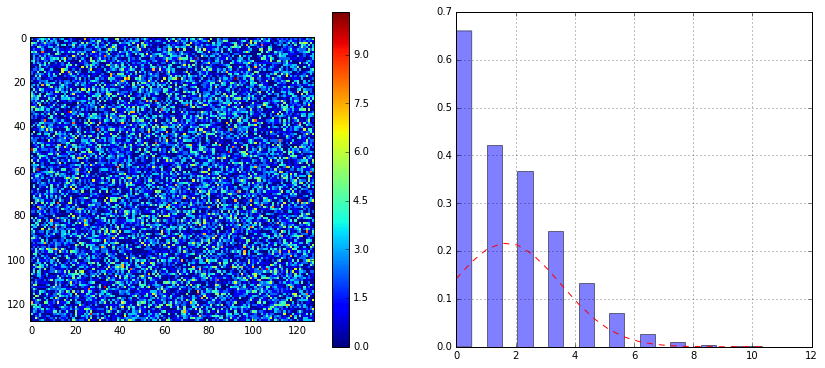

In [11]:
img.reset()
ron = 0.
nB = src.nBackgroundPhoton(18)*img.pixelScaleArcsec(src)**2
NF = np.sqrt(2)
img.readOut(1.,ron,nB,NF)

(fig,(ax1,ax2)) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(img.frame.host(),interpolation='none')
plt.colorbar(h1,ax=ax1)

s = np.sqrt(NF**2*nB+ron**2)
print nB, s
print np.mean(img.frame.host_data), np.std(img.frame.host_data)

if np.any(img.frame.host_data):
    n, bins, patches = ax2.hist(img.frame.host_data.ravel(),20, normed=1, alpha=0.5)
    y = mlab.normpdf( bins, nB, s)
    l = ax2.plot(bins, y, 'r--', linewidth=1)
    ax2.grid(True)